This is a model of the pressure in a cubic box for an ideal gas. By running the simulation, we will see that Boyle's law, 
$$ \\P \propto \frac{1}{V}$$
holds true for an ideal gas.

First, we will import a module containing the classes for this simulation, CollidingParticles, along with some modules for plotting:

In [6]:
%matplotlib notebook
from CollidingParticles import *
import numpy as np
import matplotlib.pyplot as plt

First, we will create an empty array of pressures and volumes, to which we will add the results of our simulations

In [7]:
pressures = []
volumes = []

A graph to plot the average pressure against steps taken is then made and the canvas in which the simulation will run are defined. Next, we define a container for the gas to be in, and we define a system composed of that container with 40 particles in it, which will be displayed in the canvas just made. The simulation is then run with different box sizes. Once this cell is done, execute the last cell to see the relationship that we find between P and V.

In [8]:
scene1 =  canvas(title='Gas in a box simulation')
graph1 = graph(x=0, y=0, 
      xtitle='steps', ytitle='Average pressure', 
      foreground=color.black, background=color.white, 
      xmax=1000, xmin=200)
dimension = 0.5
container = Container(dimension)
system = System(average_speed = 1, number_of_particles = 40, particle_radius = 0.03, container = container, collides = False, record_pressure = True)
while dimension <= 10: 
    system.pressure_history = []
    container.dimension = dimension
    dt = 1E-2
    f1 = gcurve(color=color.cyan)
    system.steps = 0
    while system.steps <= 1000:
        rate(150)
        system.simulate(dt)
        f1.plot(system.steps, system.pressure)
    pressures.append(system.pressure)
    volumes.append(dimension**3)
    dimension += 0.75


<IPython.core.display.Javascript object>

KeyboardInterrupt: 

Finally, once the simulation above is done, we will use the data we found to plot log(P) vs. log(V), and also show the fitted equation. If Boyle's law is correct, we expect to see a relation of
$$ \\log(P) \propto -log(V)$$

log(p)=-1.003962log(V)+(-0.005741)


<IPython.core.display.Javascript object>


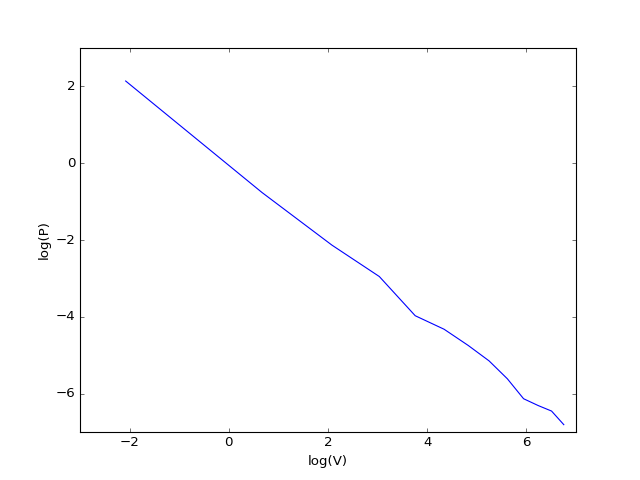

In [4]:
fitted = np.polyfit(np.log(volumes),np.log(pressures),1)
print ("log(p)=%.6flog(V)+%.6f"%(fitted[0],fitted[1]))
plt.plot(np.log(volumes),np.log(pressures))
plt.ylabel('log(P)')
plt.xlabel('log(V)')